In [2]:
try:
    from matplotlib import pyplot as plt
except:
    !pip install --quiet matplotlib
    from matplotlib import pyplot as plt
    
try:
    import cirq
except ImportError:
    !pip install --quiet cirq
    import cirq

In [9]:
def QFTinv(circuit: cirq.Circuit, *qubits: cirq.LineQubit) -> cirq.Circuit:
    """Inverse Quantum Fourier Transform Circuit using Controlled T and Controlled NOT gates

    Args:
        circuit (cirq.Circuit): Circuit to be appended to

    Returns:
        cirq.Circuit: Circuit with the Inverse Quantum Fourier Transform appended
    """
    q0, q1 = qubits

    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.CNOT(q1, q0))
    circuit.append(cirq.CNOT(q0, q1))

    circuit.append(cirq.H(q1))

    circuit.append(cirq.inverse(cirq.T(q0)).controlled_by(q1))
    circuit.append(cirq.inverse(cirq.T(q0)).controlled_by(q1))

    circuit.append(cirq.H(q0))

    circuit.append(cirq.measure(q0, q1))

    return circuit

In [4]:
def show_circuit(name: str, circuit: cirq.Circuit) -> None:
    """Prints a circuit diagram inline.

    Args:
        name (str): name of circuit
        circuit (cirq.Circuit): circuit to print
    """
    print(f"*** {name} circuit ***")
    print(circuit)

In [5]:
def simulate_and_plot(circuit: cirq.Circuit, repetition: int = 1000) -> None:
    """Simulates a circuit and plots the results.

    Args:
        circuit (cirq.Circuit): circuit to simulate
        repetition (int, optional): number of repetitions. Defaults to 1000.
    """
    simulator = cirq.Simulator()
    results = simulator.run(circuit, repetitions=repetition)
    cirq.plot_state_histogram(results, plt.subplot())
    plt.tight_layout()
    plt.show()

*** Circuit for states 00 circuit ***
0: ───@───X───@───────@─────────@─────────H───M───
      │   │   │       │         │             │
1: ───X───@───X───H───@^-0.25───@^-0.25───────M───


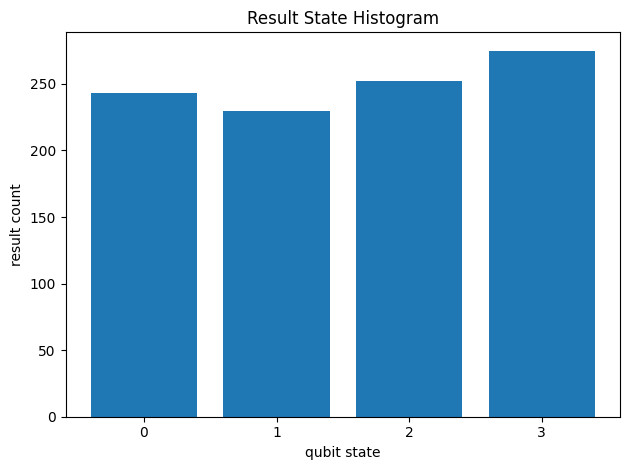

In [10]:
q0, q1 = cirq.LineQubit.range(2)

circuit = cirq.Circuit()

circuit = QFTinv(circuit, q0, q1)

show_circuit("Circuit for states 00", circuit)

simulate_and_plot(circuit)

*** Circuit for states 01 circuit ***
0: ───────@───X───@───────@─────────@─────────H───M───
          │   │   │       │         │             │
1: ───X───X───@───X───H───@^-0.25───@^-0.25───────M───


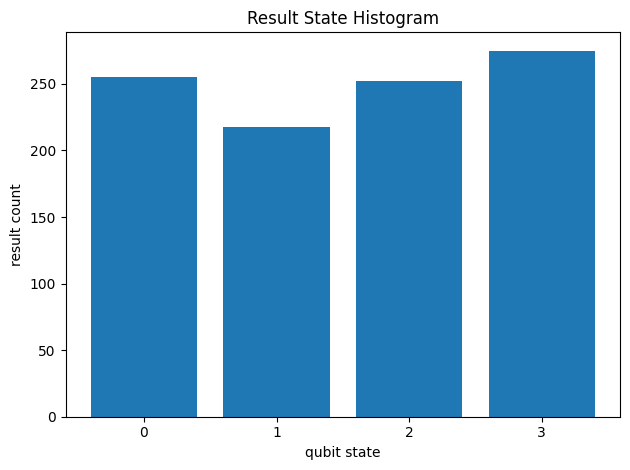

In [11]:
q0, q1 = cirq.LineQubit.range(2)

circuit = cirq.Circuit()

circuit.append(cirq.X(q1))

circuit = QFTinv(circuit, q0, q1)

show_circuit("Circuit for states 01", circuit)

simulate_and_plot(circuit)

*** Circuit for states 10 circuit ***
0: ───X───@───X───@───────@─────────@─────────H───M───
          │   │   │       │         │             │
1: ───────X───@───X───H───@^-0.25───@^-0.25───────M───


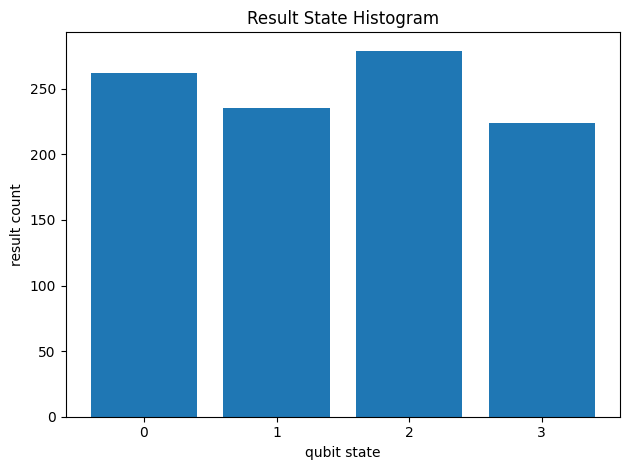

In [12]:
q0, q1 = cirq.LineQubit.range(2)

circuit = cirq.Circuit()

circuit.append(cirq.X(q0))

circuit = QFTinv(circuit, q0, q1)

show_circuit("Circuit for states 10", circuit)

simulate_and_plot(circuit)

*** Circuit for states 11 circuit ***
0: ───X───@───X───@───────@─────────@─────────H───M───
          │   │   │       │         │             │
1: ───X───X───@───X───H───@^-0.25───@^-0.25───────M───


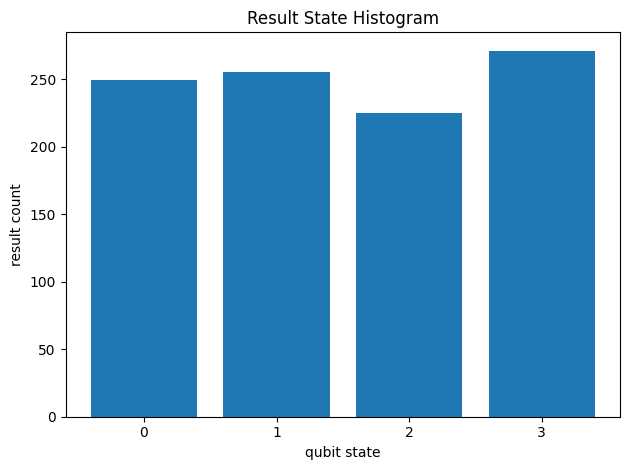

In [13]:
q0, q1 = cirq.LineQubit.range(2)

circuit = cirq.Circuit()

circuit.append(cirq.X(q0))
circuit.append(cirq.X(q1))

circuit = QFTinv(circuit, q0, q1)

show_circuit("Circuit for states 11", circuit)

simulate_and_plot(circuit)